In [3]:
!git clone https://github.com/Yong-Gon/LG2025_DTKNN.git #코랩 사용

Cloning into 'LG2025_DTKNN'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 42 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 1006.91 KiB | 3.26 MiB/s, done.
Resolving deltas: 100% (20/20), done.


# [머신러닝 기반 시계열 분석 1 실습]
# Decision Tree & k-NN
## [Decision Tree: 실전]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

## 1. 모듈 불러오기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [1]:
""" 데이터 전처리 """
import numpy as np
import pandas as pd

""" 모델 생성, 학습, 평가 """
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

""" 시각화 """
import seaborn as sns
import matplotlib.pyplot as plt

## 2. 데이터 불러오기

In [4]:
data = pd.read_csv('/content/LG2025_DTKNN/data/cold.csv')
# data = pd.read_csv('../Data/cold.csv') #로컬
data.head()

,number_treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,ozone,co,blog,twitter,news,date
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,0.014465,0.027176,0.440329,1376,4390,38,mon
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,0.015039,0.030504,0.398744,2140,5754,28,wed
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,0.015470,0.034050,0.389116,746,2854,40,fri
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,0.015915,0.026960,0.494642,1183,4522,37,mon
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,0.015271,0.039251,0.430846,1145,5686,44,mon


## Cold 데이터
#### 전국의 기상정보 + SNS에서 'cold' 검색량을 사용해서, 환자들이 병원에 방문하여 진료를 받은 건수를 예측
#### 설명변수 및 반응변수
- <span style="color:blue">number_treatment - 진료 건수 <b>[타겟 변수]</b> <br></span>
- temperature, humidity, rain, wind, sunshine, insolation, pressure, so2, fin_dust, no2, ozone, co: 기상정보
- blog, twitter, news: SNS 검색량
- date: 요일

### date 변수에 대한 더미 변수 생성

In [5]:
data = pd.get_dummies(data, columns=['date'], drop_first=True)
data.head()

,number_treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,...,co,blog,twitter,news,date_mon,date_sat,date_sun,date_thu,date_tue,date_wed
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,...,0.440329,1376,4390,38,True,False,False,False,False,False
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,...,0.398744,2140,5754,28,False,False,False,False,False,True
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,...,0.389116,746,2854,40,False,False,False,False,False,False
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,...,0.494642,1183,4522,37,True,False,False,False,False,False
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,...,0.430846,1145,5686,44,True,False,False,False,False,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number_treatment  624 non-null    int64  
 1   temperature       624 non-null    float64
 2   humidity          624 non-null    float64
 3   rain              624 non-null    float64
 4   wind              624 non-null    float64
 5   sunshine          624 non-null    float64
 6   insolation        624 non-null    float64
 7   pressure          624 non-null    float64
 8   so2               624 non-null    float64
 9   fine_dust         624 non-null    float64
 10  no2               624 non-null    float64
 11  ozone             624 non-null    float64
 12  co                624 non-null    float64
 13  blog              624 non-null    int64  
 14  twitter           624 non-null    int64  
 15  news              624 non-null    int64  
 16  date_mon          624 non-null    bool   
 1

### X, y로 구분

In [7]:
X = data.drop('number_treatment', axis=1)
y = data['number_treatment']

In [8]:
X

,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,...,co,blog,twitter,news,date_mon,date_sat,date_sun,date_thu,date_tue,date_wed
0,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,0.014465,...,0.440329,1376,4390,38,True,False,False,False,False,False
1,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,0.015039,...,0.398744,2140,5754,28,False,False,False,False,False,True
2,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,0.015470,...,0.389116,746,2854,40,False,False,False,False,False,False
3,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,0.015915,...,0.494642,1183,4522,37,True,False,False,False,False,False
4,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,0.015271,...,0.430846,1145,5686,44,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,20.663466,68.100307,0.000000,1.789122,9.985994,11.348284,1018.659071,0.003337,28.330810,0.017820,...,0.409271,2066,5565,64,True,False,False,False,False,False
620,16.903523,60.443617,0.000000,2.929799,9.847475,9.836912,1017.368901,0.002805,21.095985,0.009002,...,0.294292,1719,18687,8,False,False,True,False,False,False
621,0.639078,68.133021,0.000000,1.445739,4.145749,4.094858,1026.131353,0.006077,39.798108,0.033591,...,0.999673,2474,9011,81,False,False,False,False,True,False
622,-1.487549,52.161412,0.000000,1.717698,8.361807,6.525424,1030.300270,0.005262,33.203543,0.024179,...,0.703683,2101,10658,32,False,False,False,False,False,False


In [9]:
pd.Series(y).value_counts()

,count
number_treatment,
388743,1
688447,1
577343,1
453973,1
421367,1
...,...
368313,1
508845,1
72756,1


### 타겟 변수의 분포를 확인: 히스토그램

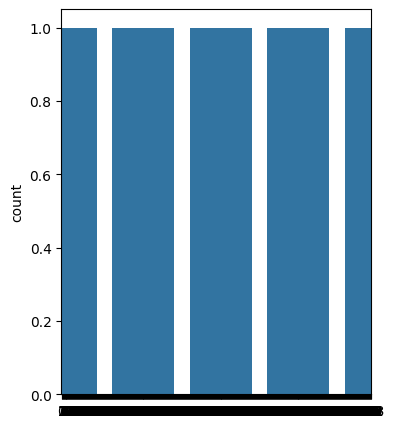

In [10]:
plt.figure(figsize=(4, 5))
sns.countplot(y)
plt.show()

### 학습-평가 데이터셋 구성
- Train:Validation:Test = 60:20:20
- randomstate = 2024

In [11]:
random_state = 2024
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/10, random_state=random_state) #, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=2/8,
                                                      random_state=random_state)#, stratify=y_train)

### Decision Tree Regressor
- 최적의 max_depth를 선택해야 함
- Validation을 사용하여 Root Mean Squared Error(RMSE), Mean Absolute Error를 고려하여 선정


<center> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$
<center> $MAE=\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

#### 탐색할 max_depth 범위를 설정

In [12]:
max_depths = list(range(1, 10)) + [None]
print(max_depths)

[1, 2, 3, 4, 5, 6, 7, 8, 9, None]


#### RMSE, MAE로 모델을 평가

In [13]:
# 평가 지표 저장
rmse_valid = []
mae_valid = []

#### 반복문을 통해서 max_depth에 따른 성능 산출

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


for max_depth in max_depths:
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)  # 회귀 모델로 변경
    model.fit(X_train, y_train)

    # validation 예측
    y_valid_pred = model.predict(X_valid)

    # 모델 평가 결과 저장
    rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))  # RMSE 계산
    mae = mean_absolute_error(y_valid, y_valid_pred)  # MAE 계산

    rmse_valid.append(rmse)
    mae_valid.append(mae)

시각화를 위해 max_depths를 문자열로 바꿔준다

In [15]:
xticks = list(map(str, max_depths))
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'None']


#### 성능 지표별 line plot 그리기

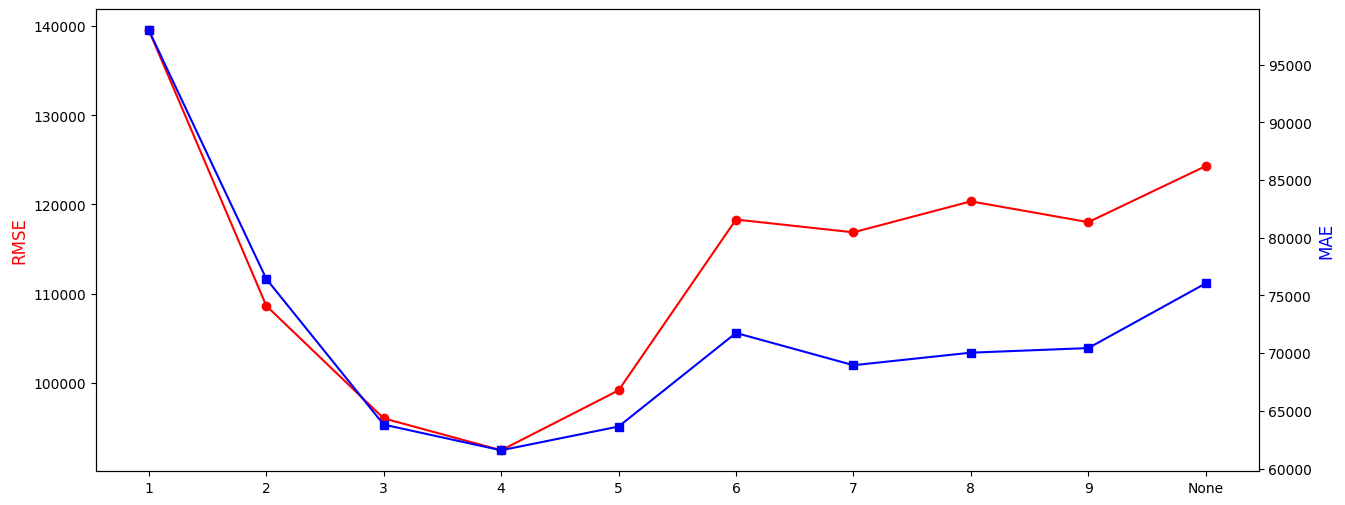

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(range(len(max_depths)), rmse_valid, color='red', marker='o')
ax.set_ylabel('RMSE', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), mae_valid, color='blue', marker='s')
ax2.set_ylabel('MAE', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

### 최적의 max_depth 설정

#### 해당 파라미터로 다시 모델을 학습

In [17]:
# 모델 학습
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

# validation 예측
y_valid_pred = model.predict(X_valid)

# 모델 평가 결과 저장
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
mae = mean_absolute_error(y_valid, y_valid_pred)

rmse_valid.append(rmse)
mae_valid.append(mae)

#### 평가 데이터에 대한 예측 결과 산출

In [19]:
#  예측
y_test_pred = model.predict(X_test)

# 모델 평가 결과 저장
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)


print('- RMSE (Test) : {:.1f}'.format(rmse))
print('- MAE  (Test) : {:.1f}'.format(mae))

- RMSE (Test) : 80264.1
- MAE  (Test) : 52779.3


## 결과 시각화

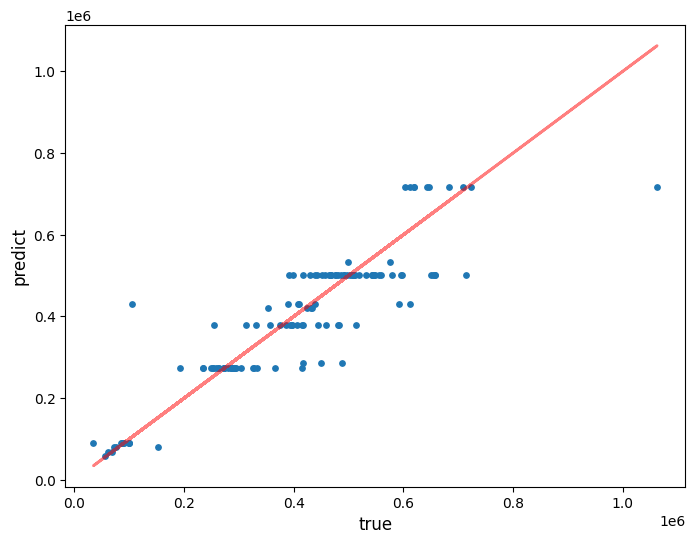

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, s=15)
plt.plot(y_test, y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

## 규칙 시각화

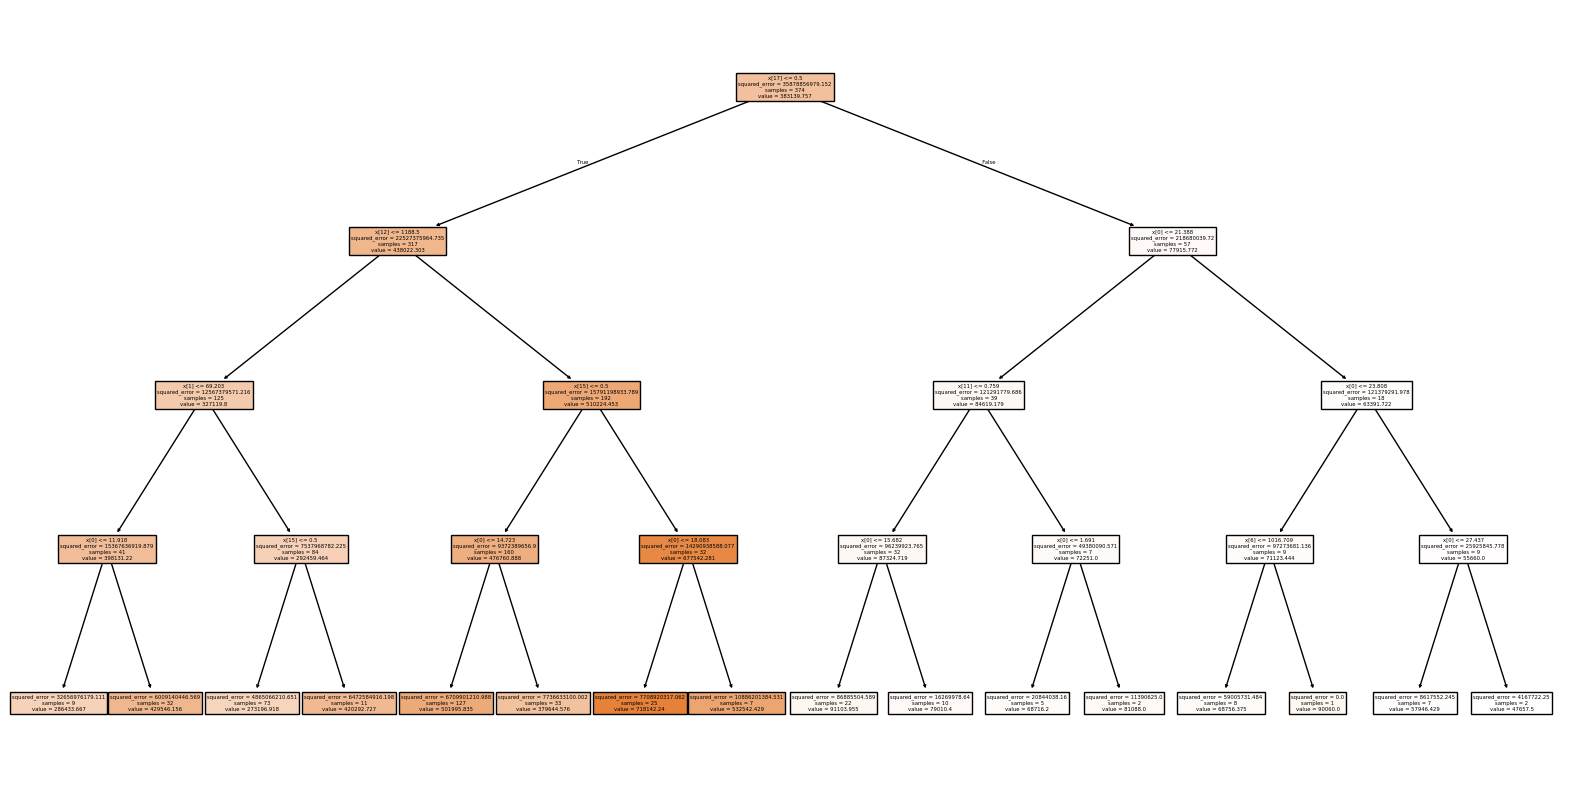

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree=model, filled=True)
plt.show()

## 변수 중요도: 공간을 split하는데 기여한 정도를 정량적으로 표현

#### 중요도 산출

In [22]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

#### bar chart로 시각화

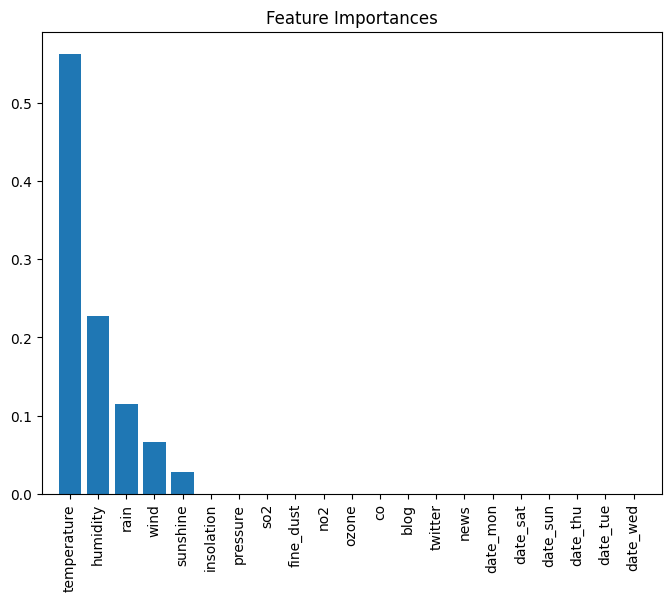

In [23]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()